# Evaluation of Performances of Artificial Neural Networks with Three Different Hidden-Layer Activation Functions in Improving the Prediction of Outcome of Bank Telemarketing

## Introduction

Bank telemarketing gained a lot of currency in the years succeeding $2008$, when the world witnessed the first of its economic recessions in the $21^{\text{st}}$ century[[1]](https://www.sciencedirect.com/science/article/abs/pii/S016792361400061X). During such bank telemarketing campaigns, usually the bank representatives would ring up those customers who are more likely to open long-term fixed deposit accounts with banks and try to convince them to do the same by presenting cogent reasons. This would be a win-win situation for both the bank as well as the customers: the bank would mint profit from such long-term fixed deposits and the customers would be assured of their financial security. 

To-day, with the entire world still grappling with CoVID-$19$ pandemic, there is a huge possibility that bank telemarketing is going to become popular simply because the global economy has again gone haywire due to the recession brought about by the pandemic. The customers are more likely to put money in long-term fixed deposit accounts so that they can remain assured of their financial stability. As a result, the banks can also hatch profits by providing such services to the customers. 

In this mini-investigation, a bank telemarketing dataset, collected by a Portugese bank between $2008$ and $2013$, has been used to predict the outcome of future bank telemarketing campaigns, purely by data-driven approach. The entire dataset originally consisted of $41188$ `datapoints` and $150$ `features`. After employing a rather simple feature selection and feature engineering algorithm[[1]](https://www.sciencedirect.com/science/article/abs/pii/S016792361400061X), the number of `features` could be brought down to just $20$. The dataset is available in [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing). 

The rest of the  notebook is organized as follows:
* **Problem Formulation**: A precise description of the datapoints, features and labels of the bank telemarketing dataset is provided in this section. Moreover, a brief description of the metrics used for proper evaluation of the results, obtained by employing Artificial Neural Network with $3$ different hidden-layer activation functions, has also been provided.  
* **Methods**: A much more thorough description of the dataset, alongwith its features and labels, is presented in this section. The bank telemarketing dataset used in this project does contain some categorical features which need to be encoded. The features also need to be scaled in order to obtain a Gaussian distribution with zero mean and unit standard deviation. A brief description of these data pre-processing methods are also provided in this section. Furthermore, the Artificial Neural Network with $3$ different hidden-layer activation functions are discussed in sufficient details for the ease of comprehension of the readers. 
* **Results**: This is the final section of the notebook. Over here, the results obtained by deploying the models trained on Artificial Neural Networks with $3$ different hidden-layer activation functions on the test dataset are visualized, analyzed and critically discussed. This section also allows the readers to gain insight into the inferences drawn from the results and they get to know the logic behind the author's choice of the best Artificial Neural Network model for the given bank telemarketing dataset.  

## Problem Formulation

### Dataset

The dataset used for this project is a bank telemarketing dataset, which has been taken from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing). The dataset consists of $41188$ `datapoints` and $20$ `features`. This is a dataset for binary classification purposes, so it contains $2$ unique `labels` or `classes`. 

Artificial Neural Network algorithm has been used in order to determine whether a particular customer is going to open a long-term fixed deposit account in a bank, following a rigorous telemarketing campaign from the same bank. Such a data-driven approach to determine the outcome of a telemarketing campaign by utlizing previously collected data is essential for the bank because:
1. The bank representatives would be more informed about the outcome before they start ringing up potential customers interested in opening fixed-deposit accounts with the bank
2. They can channelize their precious time in doing something productive rather than calling up potentially disinterested customers and wasting their own valuable time 

Before the dataset can be fetched, some compulsory libraries, modules and classes need to be imported for ease of using Artificial Neural Network algorithm and carrying out a number of operations in this notebook. 

### Import the Mandatory Libraries

In [1]:
### Coding Cell 001

# Importing libraries compulsory for the entire notebook 
import numpy as np   
import matplotlib.pyplot as plt   
import seaborn as sns
import pandas as pd   
import tensorflow  
import itertools
import sys
import warnings

# Some other compulsory things
from numpy.random import seed
seed(0)
tensorflow.random.set_seed(0)
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

### Import the Dataset

It is time to import the dataset which contains $41188$ datapoints and $20$ features. 

In [2]:
### Coding Cell 002

# Importing the dataset
featureMatrix = pd.read_csv('bankTelemarketingFeatureMatrix.csv') 
labelVector = pd.read_csv('bankTelemarketingLabels.csv') 

# Creating feature matrix and label vector
X = featureMatrix.values   
y = labelVector.values.reshape(-1,1)   

# Creating eye-pleasing versions of feature matrix and label vector
X_better = pd.DataFrame(featureMatrix)   
y_better = pd.DataFrame(labelVector)  

# Displaying the number of datapoints, features and labels
print(f'Total number of (datapoints, features): {X.shape}')
print(f'Total number of unique labels: {np.unique(y).shape[0]}')

Total number of (datapoints, features): (41188, 20)
Total number of unique labels: 2


### Datapoints

The datapoints are basically the `customers` who were contacted during telemarketing campaign by a bank in Portugal between $2008$ and $2013$: the years succeeding the first of the global recessions in the $21^{\text{st}}$ century. A total of $41188$ customers were contacted during the aforementioned period and details regarding their `AgeInYears`, `JobType`, `MaritalStatus`, `EducationalQualification` --- to cite a few --- were recorded for future investigations with data-driven approaches.

### Features

The bank telemarketing dataset consists of $20$ features. Some of these features are `categorical`, while the rest of them are `numeric`. A brief description of all the $20$ features are depicted in the figure below. 

<img src="featureDescriptionTable.png" width="700">


#### Outcomes with regard to the customers' Age

Now, let us take a look at those persons, from different `age groups`, who said either a `yes` or a `no` to the previous telemarketing campaign. Such categorization can give a clear picture to the bank employees about whom to contact. 

In [3]:
# Coding Cell 003

# Importing the libraries, modules and classes necessary for this cell
from itertools import cycle, islice

# Creating a category with the customers' ages
ageList = ['< 25 yrs', '25 - 40 yrs', '41 - 60 yrs', '> 60 yrs']

# Getting the indices
idx001 = np.where(X[:, 0] < 25)
idx002 = np.where((X[:, 0] >= 25) & (X[:, 0] <= 40))
idx003 = np.where((X[:, 0] > 40) & (X[:, 0] <= 60))
idx004 = np.where(X[:, 0] > 60)

# Calculating the total no. of categories and forming a pandas dataframe
ageCategories = np.array([idx001[0].shape[0], idx002[0].shape[0], 
                          idx003[0].shape[0], idx004[0].shape[0]])
ageCategories = ageCategories.reshape(-1,1)
ageCategories_df = pd.DataFrame({'Total Count': ageCategories[:, 0]},
                                index = ageList)

# Calculating the total no. of "No" and "Yes"
resultsList = []
yVal001 = y[idx001[0]]
yVal002 = y[idx002[0]]
yVal003 = y[idx003[0]]
yVal004 = y[idx004[0]]
yNo001 = (yVal001 == 0).sum()
yYes001 = np.count_nonzero(yVal001 == 1)
yNo002 = (yVal002 == 0).sum()
yYes002 = np.count_nonzero(yVal002 == 1)
yNo003 = (yVal003 == 0).sum()
yYes003 = np.count_nonzero(yVal003 == 1)
yNo004 = (yVal004 == 0).sum()
yYes004 = np.count_nonzero(yVal004 == 1)
ageOutcomes = np.array([[yNo001, yYes001],
                       [yNo002, yYes002],
                       [yNo003, yYes003],
                       [yNo004, yYes004]])
ageOutcomes_df = pd.DataFrame({'No': ageOutcomes[:, 0],
                               'Yes': ageOutcomes[:, 1]},
                              index = ageList)

# Creating a pandas dataframe in order to visualize the outcomes age group-wise
age_df = pd.DataFrame({'Total Count': ageCategories[:, 0],
                       'No': ageOutcomes[:, 0],
                       'Yes': ageOutcomes[:, 1]},
                      index = ageList)

# Displaying the outcomes
print('\nOutcomes with regard to the Age of the customers')
display(age_df)


Outcomes with regard to the Age of the customers


,Total Count,No,Yes
< 25 yrs,1068,812,256
25 - 40 yrs,22700,20235,2465
41 - 60 yrs,16510,15005,1505
> 60 yrs,910,496,414


We find that almost $45\%$ from the age group of `> 60 yrs` said `yes` to long-term fixed deposit accounts. It is quite expected because people from this age group are generally more concerned about their financial stability than people from the other age groups. 

#### Outcomes with regard to the customers' Job Type

Now, we would also like to take a look at how people with different `job types` responded to the bank telemarketing campaign on opening of fixed-term deposit accounts. 

Two user-defined functions, such as `get_category_occurrences` and `get_outcomes` are created in order to make the task of segregating the outcomes according to a number of categories way easier. 

In [4]:
# Coding Cell 004

# Creating a User-Defined Function which returns the no. of occurrences of a 
# category in a list
def get_category_occurrences(X_, list_, col_):
  """
  Returns the number of occurrences of a particular category

  Args:
    X_ (matrix, shape = [n, d]): Feature matrix
    list_ (list): List of names of all categories
    col_ (scalar): The feature of interest
  """

  # Creating an empty list to store the no. of occurrences of a 
  # category in a given list
  category_occurrences_ = []

  # Calculating the no. of occurrences of a category in a given list
  for i in range(len(list_)):
    indicesOfList_ = np.where(X_[:, col_] == list_[i])
    indices_ = indicesOfList_[0]
    sum_ = indices_.shape[0]
    category_occurrences_.append(sum_)

  # Return the no. of occurrences of a category in a given list
  category_occurrences_ = np.asarray(category_occurrences_).reshape(-1,1)
  return category_occurrences_

In [5]:
# Coding Cell 005

# Creating a User-Defined Function for Returning the Total Occurrences 
# of "No" and "Yes"
def get_outcomes(X_, y_, list_, col_):
  """
  Returns the outcome against a particular category

  Args:
    X_ (matrix, shape = [n, d]): Feature matrix
    y_ (vector, shape = [n, 1]): Label vector
    list_ (list): List of names of all categories
    col_ (scalar): The feature of interest
  """

  # Creating an empty list to store the total occurrences of "No" and "Yes" 
  outcomes_ = []

  # Calculating the total occurences of "No" and "Yes" for a given list
  for i in range(len(list_)):
    indicesOfList_ = np.where(X_[:, col_] == list_[i])
    indices_ = indicesOfList_[0]
    yValues_ = y_[indices_]
    yNo_ = (yValues_ == 0).sum() 
    yYes_ = np.count_nonzero(yValues_ == 1)
    outcomes_.append(np.array([yNo_, yYes_]))

  # Returning total occurrences of "No" and "Yes"
  outcomes_ = np.asarray(outcomes_)
  return outcomes_

In [6]:
# Coding Cell 006

# Importing the libraries, modules and classes necessary for this cell
from itertools import cycle, islice

# Creating the lists
jobTypeList = ['unknown', 'unemployed', 'student', 'housemaid',
               'technician', 'services', 'blue-collar', 'management',
               'admin.', 'entrepreneur', 'self-employed', 'retired']

# Calculating the total no. of occurrences of categories
jobTypeCategories = get_category_occurrences(X_ = X,
                                             list_ = jobTypeList,
                                             col_ = 1)
jobTypeCat_df = pd.DataFrame({'Total Count': jobTypeCategories[:, 0]},
                             index = jobTypeList)

# Calculating the total no. of "No" and "Yes" for each job category
jobTypeOutcomes = get_outcomes(X_ = X,
                               y_ = y,
                               list_ = jobTypeList, 
                               col_ = 1)
jobTypeOutcomes_df = pd.DataFrame({'No': jobTypeOutcomes[:, 0],
                                   'Yes': jobTypeOutcomes[:, 1]},
                                  index = jobTypeList)

# Creating a pandas dataframe in order to visualize the outcome job category-wise
jobType_df = pd.DataFrame({'Total Count': jobTypeCategories[:, 0],
                           'No': jobTypeOutcomes[:, 0],
                           'Yes': jobTypeOutcomes[:, 1]},
                          index = jobTypeList)

# Displaying the outcomes
print('\nOutcomes with regard to the Job Type of the customers')
display(jobType_df)


Outcomes with regard to the Job Type of the customers


,Total Count,No,Yes
unknown,330,293,37
unemployed,1014,870,144
student,875,600,275
housemaid,1060,954,106
technician,6743,6013,730
services,3969,3646,323
blue-collar,9254,8616,638
management,2924,2596,328
admin.,10422,9070,1352
entrepreneur,1456,1332,124


#### Outcomes with regard to the customers' Marital Status

Now, we take a look at the outcome of the bank telemarketing when customers with different `marital status` were contacted.  

In [7]:
# Coding Cell 007

# Importing the libraries, modules and classes necessary for this cell
from itertools import cycle, islice

# Creating a list
maritalStatusList = ['unknown', 'single', 'married', 'divorced']

# Calculating the total no. of occurrences of categories
maritalStatusCategories = get_category_occurrences(X_ = X,
                                                   list_ = maritalStatusList,
                                                   col_ = 2)
marStatCategories_df = pd.DataFrame({'Total Count': maritalStatusCategories[:, 0]},
                                    index = maritalStatusList)

# Calculating the total no. of "No" and "Yes" for each marital status category
maritalStatusOutcomes = get_outcomes(X_ = X,
                                     y_ = y,
                                     list_ = maritalStatusList,
                                     col_ = 2)
marStatOutcomes_df = pd.DataFrame({'No': maritalStatusOutcomes[:, 0],
                                   'Yes': maritalStatusOutcomes[:, 1]},
                                  index = maritalStatusList)

# Creating a pandas dataframe in order to visualize 
# the outcome marital status category-wise
marStat_df = pd.DataFrame({'Total Count': maritalStatusCategories[:, 0],
                           'No': maritalStatusOutcomes[:, 0],
                           'Yes': maritalStatusOutcomes[:, 1]},
                          index = maritalStatusList)

# Displaying the outcomes
print('\nOutcomes with regard to the Marital Status of the customers')
display(marStat_df)


Outcomes with regard to the Marital Status of the customers


,Total Count,No,Yes
unknown,80,68,12
single,11568,9948,1620
married,24928,22396,2532
divorced,4612,4136,476


#### Outcomes with regard to the customers' Educational Qualification

And, finally, we take a look at how the people with different `educational qualifications` responded to the bank-telemarketing campaign.

It is quite evident from these four categories that people were not quite convinced when it came to opening long-term fixed deposit accounts as negative responses clearly outnumber positive responses. 

In [8]:
# Coding Cell 008

# Importing the libraries, modules and classes necessary for this cell
from itertools import cycle, islice

# Creating a list
educationalQualificationList = ['unknown', 'illiterate', 'basic.4y', 
                                'basic.6y', 'basic.9y', 'high.school', 
                                'professional.course', 'university.degree']

# Calculating the total no. of occurrences of categories
edQualCategories = get_category_occurrences(X_ = X,
                                            list_ = educationalQualificationList,
                                            col_ = 3)
edQualCat_df = pd.DataFrame({'Total Count': edQualCategories[:, 0]},
                            index = educationalQualificationList)

# Calculating the total no. of "No" and "Yes" for each 
# educational qualification category
educationQualificationOutcomes = get_outcomes(X_ = X,
                                              y_ = y,
                                              list_ = educationalQualificationList, 
                                              col_ = 3)
edQualOutcomes_df = pd.DataFrame({'No': educationQualificationOutcomes[:, 0],
                                  'Yes': educationQualificationOutcomes[:, 1]},
                                 index = educationalQualificationList)

# Creating a pandas dataframe in order to visualize 
# the outcome educational qualification category-wise
edQual_df = pd.DataFrame({'Total Count': edQualCategories[:, 0],
                          'No': educationQualificationOutcomes[:, 0],
                          'Yes': educationQualificationOutcomes[:, 1]},
                         index = educationalQualificationList)

# Displaying the outcomes
print('\nOutcomes with regard to the Educational Qualification of the customers')
display(edQual_df)


Outcomes with regard to the Educational Qualification of the customers


,Total Count,No,Yes
unknown,1731,1480,251
illiterate,18,14,4
basic.4y,4176,3748,428
basic.6y,2292,2104,188
basic.9y,6045,5572,473
high.school,9515,8484,1031
professional.course,5243,4648,595
university.degree,12168,10498,1670


### Labels

The bank telemarketing dataset contains only $2$ `unique` labels or classes --- `No` and `Yes`. 

In [9]:
# Coding Cell 009

# Defining the class and label names
class_names = ["No", "Yes"]
label_names = ['No', 'Yes']

# Defining the unique labels
uniqueLabels = [0, 1]

# Display numeric labels and corresponding label names
print('Class Value \t Outcome Category')
for uniqueLabels, class_names in zip(uniqueLabels, class_names):
    print (f'{uniqueLabels} \t\t {class_names}')

Class Value 	 Outcome Category
0 		 No
1 		 Yes


### Metrics 

`Accuracy` is the metric used for determining the quality of the models trained on Artificial Neural Network with $3$ different hidden-layer activation functions. 

We shall like to train those Artificial Neural Networks on the `training` dataset and obtain both the accuracy as well as the average losses on the `validation` dataset. We must aim for the increase in the accuracy with each epoch for models applied on unseen datasets (`validation` and `test`). Higher the accuracy on these datasets, the better the prediction of outcomes. 

Previously, the deployment of machine learning methods, such as Logistic Regression, Decision Trees and Support Vector Machines, on this very dataset yielded an accuracy of only $76\%$[[1]](https://www.sciencedirect.com/science/article/abs/pii/S016792361400061X). The **target** in this investigation is to obtain an accuracy of, at least, $85\%$ with the Artificial Neural Network algorithm. 

## Methods

The dataset consists of $41188$ datapoints and $20$ features. Some of the features contain categorical (non-numeric) data. However, none of the machine learning or deep learning algorithms can handle any categorical data. So, these types of data need to be encoded (which is nothing but converting the categorical data to numeric data). 

Some of the features of this dataset contain large numbers (of the order of $1000$), while the others contain very small numbers (of the order of $0.1$). In such cases, chances are that data would be more skewed towards the larger numbers. Therefore, scaling of the features becomes necessary here, in order to make the entire dataset have a Gaussian distribution with zero mean and unit standard deviation. 

Following these data pre-processing stage, the entire dataset would be divided into training, validation and test datasets. Artificial Neural Network (ANN) algorithm with $3$ different hidden-layer activation functions, namely `relu`, `elu` and `tanh`, would hence be deployed on the training dataset in order to obtain the $3$ different models. These models would then be applied on validation and test datasets in order to figure out as to which one could be used to correctly predict the outcome of bank telemarketing campaign.  

### Pre-Process the Dataset

#### Encode Categorical Data in Feature Matrix

The categorical data in the dataset will now be converted to numeric data in this stage. `OneHotEncoder`, in combination with `ColumnTransformer`, from `sklearn` library is being used in order to encode those categorical data. 

Categorical data appear in columns $1$, $2$, $3$, $4$, $5$, $6$, $7$, $8$, $9$ and $14$ (following the convention of Python column-numbering) in the dataset. The data in these columns need to be converted to numeric data. 

In [10]:
### Coding Cell 010

# Importing the classes, modules and libraries necessary for this cell
from sklearn.compose import ColumnTransformer   
from sklearn.preprocessing import OneHotEncoder   

# Transforming those columns of X which contain categorical data 
ct = ColumnTransformer(transformers=[('encoder',         
                                      OneHotEncoder(),   
                                      [1, 2, 3, 4, 5,
                                       6, 7, 8, 9, 14
                                      ]
                                     )
                                    ],
                       remainder='passthrough')   

# Creating a new feature matrix X_encoded with encoded categorical data
X_encoded = np.array(ct.fit_transform(X))   

#### Scale the features in Feature Matrix (Feature-Scaling)

Some of the features in the dataset are of the order of $1000$, while the others are of the order of $0.1$. So, in order to eliminate such skewness in the data, scaling of all the features are necessary. It would allow the entire dataset to have a Gaussian distribution with zero mean and unit standard deviation. 

`StandardScalar` from `sklearn` library has been used for scaling the features of the dataset. 

In [11]:
### Coding Cell 011

# Importing the classes, modules and libraries necessary for this cell
from sklearn.preprocessing import StandardScaler   

# Creating an instance of the StandardScaler class
sc = StandardScaler()   

# Scaling the feature matrix
X_scaled = sc.fit_transform(X_encoded)   

### Artifcial Neural Network (ANN)

#### Splitting the Dataset into Training, Validation and Test Datasets

After the necessary preprocessing of the dataset, it is now time to split the entire dataset into training, validation and test datasets. 

The entire dataset is first segregated into `trainval` and `test` datasets in the ratio of $75$:$25$. Thereafter, the `trainval` dataset is further divided into `train` and `val` datasets in the same ratio of $75$:$25$. The ones with `_NN` are used for working with Artificial Neural Network. The ones without `_NN` have been used for computing the confusion matrices.  

ANN with $3$ different activation functions will be trained on the trainig dataset. Validation dataset would be used to obtain the accuracy and average loss of the models on unseen data. Finally, test dataset would be used to confirm the efficacy of the models in predicting outcomes. 

In [12]:
### Coding Cell 012

# Importing the classes, modules and libraries necessary for this cell
from sklearn.model_selection import train_test_split   

# Encoding main labels into OneHot Representation
y_NN = tensorflow.keras.utils.to_categorical(y)  

# Splitting the entire dataset into trainval and test datasets for computing 
# confusion matrix 
X_trainval, X_test, y_trainval, y_test = train_test_split(X_scaled,   
                                                          y,     
                                                          test_size = 0.25,   
                                                          random_state = 0   
                                                         )

# Splitting the entire dataset into trainval and test datasets 
# for Neural Networks
X_trainval_NN, X_test_NN, y_trainval_NN, y_test_NN = train_test_split(
                                                               X_scaled,   
                                                               y_NN,     
                                                               test_size = 0.25,   
                                                               random_state = 0   
                                                              )

# Splitting the trainval dataset into training and validation datasets  
# for computing confusion matrix
X_train, X_val, y_train, y_val = train_test_split(X_trainval,   
                                                  y_trainval,     
                                                  test_size = 0.25,   
                                                  random_state = 0   
                                                 )

# Splitting the trainval dataset into training and validation datasets 
# for Neural Networks
X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(X_trainval_NN,   
                                                              y_trainval_NN,     
                                                              test_size = 0.25,   
                                                              random_state = 0   
                                                             )

# Displaying the dimensions of training, validation and test datasets
print(f'Training dataset: {X_train_NN.shape}')
print(f'Validation dataset: {X_val_NN.shape}')
print(f'Test dataset: {X_test_NN.shape}')

Training dataset: (23168, 63)
Validation dataset: (7723, 63)
Test dataset: (10297, 63)


#### Defining the Hypothesis Space (Model Structure) for ANN with RELU as Activation Function

Here comes the model with the first of the $3$ different hidden-layer activation functions. The activation function for the hidden-layer is `relu`. 

The hidden-layer is going to contain $64$ neurons, which is the closest $2^{n}$ to $63$, which in turn is the new number of features (visible from the shapes of the datasets above) after encoding of categorical data and scaling of features. 

The output-layer consists of two neurons --- one for `no` and the other for `yes`. The activation function for the output-layer is `sigmoid`. 

A method known as `summary()` is called on model to view the information about model created just now. The following information can be obtained about the model:
- The number of parameters (weights) in each layer
- The total number of parameters (weights) in the model
- The layers and their order in the model
- The output shape of each layer

In [13]:
### Coding Cell 013

# Importing the classes, modules and libraries necessary for this cell
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

# Creating an object "model" that represents an ANN
model_with_RELU = Sequential()       

# Defining an input layer with 63 nodes (equal to X_train.shape[1]) and 
# adding a hidden layer with 64 (closest 2^n to 63) neurons
n = X_trainval_NN.shape[0]
d = X_trainval_NN.shape[1]
neurons = 64
model_with_RELU.add(Dense(units = neurons, 
                          
                          # Activation function for hidden layer
                          activation = 'relu',   
                          
                          input_shape = (d,)
                         )
                   )

# Adding output later consisting of 2 neurons 
# (equal to the number of unique labels)
model_with_RELU.add(Dense(units = 2, 
                          
                          # Activation function for output layer
                          activation='sigmoid'   
                         )
                   ) 

# Displaying the summary of the model for ANN
model_with_RELU.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4096      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________


#### Graphically Displaying the ANN Hypothesis Space of the Model with RELU as Activation Function

The aforementioned textual summary can be difficult to interpret for ANN structures with multiple inputs or outputs. For this purpose, `tf.keras` provides a function called `plot_model()` to create a graphical summary of the ANN which might be easier to interpret. This same `plot_model()` function is now used in order to graphically display the summary of the model created with `relu` activation function for the hidden-layer. 

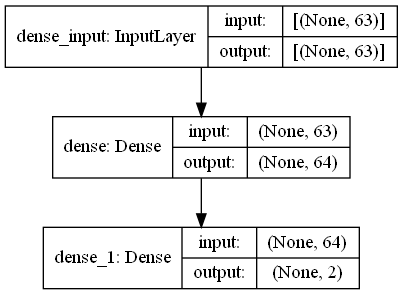

In [14]:
### Coding Cell 014

# Graphically displaying the ANN hypothesis space
tensorflow.keras.utils.plot_model(model_with_RELU,
                                  to_file = 'model_with_RELU.png',
                                  show_shapes = True, 
                                  show_layer_names = True
                                 )

#### Choosing Optimizer, Loss Function and Metrics for the Model with RELU as Activation Function

In the coding cell below, $3$ essential things for the model are defined:
1. the specific SGD variant for tuning the weights of the ANN
2. the loss function used to measure the quality of particular choice for the weights
3. the metric to assess the performance of the final choice for the weights. 

For the model created with `relu` as activation function for the hidden-layer, `RMSprop()` has been chosen as the specific SGD variant, `binary_crossentropy` is chosen as the loss function (since there are only $2$ categories) and `accuracy` as the metric. 

In [15]:
### Coding Cell 015

# Selecting Optimizer, Loss Function and Measure of quality
model_with_RELU.compile(
                        # Optimizer            
                        optimizer=tensorflow.keras.optimizers.RMSprop(), 
    
                        # Loss function    
                        loss='binary_crossentropy',   
                      
                        # Measure of quality
                        metrics=['accuracy']   
                       )   

#### Training the Artificial Neural Network (ANN) Model on the Training Dataset with RELU as Activation Function

The ANN with `relu` as the activation function for the hidden-layer is now ready to be trained on the training dataset `X_train_NN`. However, before running the following coding cell, there are some parameters inside the `.fit()` method which would require further elaboration:
- **batch_size**: It defines the number of samples per gradient update. If not specified, the default value would be $32$. However, for the ease of understanding, it has been set to $32$ here. 
- **epochs**: This parameter is the number of times the optimization algorithm uses the entire dataset for tuning the weights. Generally the training error decreases with increasing number of epochs. The `epochs` is kept at $15$. 
- **validation_data**: This data is required in order to evaluate the performance of the trained model on hitherto unseen data. `X_val_NN` and `y_val_NN` are passed as arguments for `validation_data`.  

In [16]:
### Coding Cell 016

# Specifying the no. of epochs 
n_of_epochs = 15

# Fitting the model
hist_with_RELU = model_with_RELU.fit(x = X_train_NN, 
                                     y = y_train_NN, 
                                     batch_size = 32, 
                                     epochs = n_of_epochs,
                                     verbose = 0,
                                     validation_data = (X_val_NN, y_val_NN))

#### Predicting Labels of Training and Validation Datasets trained on ANN Model with RELU as Activation Function

The labels for the training as well as the validation datasets are predicted in the following coding cell. The predicted labels will be compared with the true labels of the datasets in order to find out the accuracy of the ANN with `relu` as the activation function for the hidden-layer. 

In [17]:
### Coding Cell 017

# Importing the classes, modules and libraries necessary for this cell
from sklearn.preprocessing import OneHotEncoder

# Predicting the Labels of Training Dataset trained on ANN Model with RELU 
enc = OneHotEncoder()   # Instance of OneHotEncoder() class
enc.fit(y)   # Fitting labels into the previously created instance "enc"
y_train_RELU_pred_encoded = model_with_RELU.predict(X_train, batch_size = 32)
y_train_RELU_pred = enc.inverse_transform(y_train_RELU_pred_encoded)                     

# Predicting the Labels of Validation Dataset trained on ANN Model 
y_val_RELU_pred_encoded = model_with_RELU.predict(X_val, batch_size = 32)                    
y_val_RELU_pred = enc.inverse_transform(y_val_RELU_pred_encoded)             

#### Computing the Confusion Matrices of Training and Validation Datasets trained on ANN Model with RELU as Activation Function

<img src="picConfusionMatrix.png" width="275">

Confusion matrices can give some important information about the accuracy of any model created for prediction purposes. By definition, a confusion matrix $\textbf{C}$ is such that $\textbf{C}_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

Thus, in case of binary classification, $\textbf{C}_{0,0}$ gives the count of `true negatives` and $\textbf{C}_{1,1}$ gives the count of `true positives`. $\textbf{C}_{0,1}$ would give the count of `false positives`: the number of outcomes predicted to be positive but are negative in reality. $\textbf{C}_{1,0}$ would give the count of `false negatives`: the number of outcomes predicted to be negative but are positive in reality.  

False positives are also known as Type-I errors as the model predicted the outcome to be positive but those outcomes were negative in reality. It means that, our model predicted that someone would open a fixed-deposit account but that person actually did not open an account in reality. 

False negatives are known as Type-II errors. It is because the model predicted an outcome to be negative but it was positive in reality. It means that, the model predicted that someone would not open a fixed-deposit bank account but did so in reality. From the perspective of any bank, missing out on such a potential customer would lead to the bank's loss. Hence, reduction in false negatives is also one of the goals over here as well. 

In [18]:
### Coding Cell 018

# Creating a User-Defined Function for Computing Confusion Matrices
def compute_confusion_matrix(yTrue, yPred):
  """
  Returns confusion matrix

  Args:
    yTrue (vector, shape = [n, 1]): True label vector of the dataset
    yPred (vector, shape = [n, 1]): Predcited label vector of the dataset
  """

  # Importing the classes, modules and libraries necessary for this cell
  from sklearn.metrics import confusion_matrix

  # Computing the confusion matrix
  cm = confusion_matrix(y_true = yTrue,
                        y_pred = yPred,
                        normalize = 'all')
  cm = np.around(cm, 2)

  # Returning the confusion matrix
  return cm 

In [19]:
### Coding Cell 019

# Evaluating Confusion Matrices of Training and Validation Datasets
cm_train_RELU = compute_confusion_matrix(yTrue = y_train,
                                         yPred = y_train_RELU_pred)
cm_val_RELU = compute_confusion_matrix(yTrue = y_val,
                                       yPred = y_val_RELU_pred)

#### Displaying Overall Accuracy Scores, Visualizing Prediction Accuracy v/s Epoch, Visualizing Losses v/s Epoch and Visualizing Confusion Matrices of Training and Validation Datasets trained on ANN Model with RELU as Activation Function

The overall accuracy scores, average losses and confusion matrices for both the training as well as the validation datasets are visualized via codes in the following coding cells. The visualization of the prediction accuracy and average loss against epochs will give a rough idea about:
- how fast the optimization algorithm improves the loss function by adjusting the weights
- whether there is any significant progress made anymore 
- whether the resulting predictor is overfitting, that is, if the validation loss is higher than the training loss

In [20]:
### Coding Cell 020

# Creating a User-Defined Function for Plotting Prediction Accuracy and Losses v/s Epoch
def plot_accloss_vs_epochs(train_accloss_vector_NN, val_accloss_vector_NN, 
                           epochs, datasets, isLoss):
  """
  Returns a figure containing Accuracy Scores/Incorrect Preds v/s Epoch for Training and 
  Validation

  Args:
    train_accloss_vector_NN (vector, shape = [n, ]): Vector containing training-set 
                                                     correct/incorrect pred scores
    val_accloss_vector_NN (vector, shape = [n, ]): Vector containing validation-set 
                                                   correct/incorrect pred scores
    epochs (scalar): Number of epochs
    datasets (list, len = 3): List of names of all datasets
    isLoss (boolean): True if avg loss scores passed, False if accuracy scores passed
  """

  # Creating a vector for x-axis of the plot
  stopp = epochs + 1
  epochs_vector = np.arange(start = 1, stop = stopp, step = 1)
  epochs_vector = epochs_vector.reshape(-1,1)

  # Creating vectors to be used for titles and ylabels
  accLossTitle = []  # Vector to store accuracy scores
  accLossYLabel = []   # Vector to store incorrect predictions
  if (isLoss):
    accLossTitle.append('Losses ')
    accLossYLabel.append('Losses (%)')
  else:
    accLossTitle.append('Prediction Accuracy ')
    accLossYLabel.append('Prediction Accuracy (%)')

  # Declaring a figure handle which will be returned eventually
  figure = plt.figure(figsize=(16, 5))

  #---- Acc/Loss v/s Epochs for Training Datasets ----#
  ax1 = figure.add_subplot(131)  # add subplot 1
  plt.plot(epochs_vector, train_accloss_vector_NN, 
           color = 'tab:blue')  # plot accuracy v/s epochs
  plt.title(accLossTitle[0] + "v/s Epochs for \n " + datasets[0])  # set title
  plt.ylabel(accLossYLabel[0])  # set ylabel
  plt.xlabel('Epochs')  # set xlabel
  plt.tight_layout()

  #---- Acc/Loss v/s Epochs for Validation Datasets ----#
  ax2 = figure.add_subplot(132)  # add subplot 2
  plt.plot(epochs_vector, val_accloss_vector_NN, 
           color = 'tab:orange')  # plot accuracy v/s epochs
  plt.title(accLossTitle[0] + "v/s Epochs for \n " + datasets[1])  # set title
  plt.ylabel(accLossYLabel[0])  # set ylabel
  plt.xlabel('Epochs')  # set xlabel
  plt.tight_layout()

In [21]:
### Coding Cell 021

# Creating a User-Defined Function for Plotting Confusion Matrices

def plot_custom_confusion_matrix(cm1, cm2, label_names, datasets):
  """
  Returns a matplotlib figure containing plotted confusion matrices

  Args:
    cm1 (array, shape = [n, n]): a confusion matrix 
    cm2 (array, shape = [n, n]): a confusion matrix 
    label_names (list, len = m): List of names of the integer labels
    datasets (list, len = m): List of names of all datasets
  """
  
  # Defining a figure handle which would be returned eventually
  figure = plt.figure(figsize=(21, 5))

  #---- Confusion Matrix Plot for Training Datasets ----#
  ax1 = figure.add_subplot(131)  # add subplot 1
  plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Blues)  # show the cm
  plt.title("Normalized Confusion Matrix for " + datasets[0])  # set title
  plt.colorbar()  # set color palette
  tick_marks = np.arange(len(label_names))  # set tick_marks
  plt.xticks(tick_marks, label_names, rotation=45)  # set xticks
  plt.yticks(tick_marks, label_names)  # set yticks
  """
  Use white text if squares are dark; otherwise black.
  """
  threshold = cm1.max() / 1.2  # set the threshold value for font colors
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    color = "white" if cm1[i, j] > threshold else "black"
    plt.text(j, i, cm1[i, j], horizontalalignment="center", color=color)
  plt.tight_layout()
  plt.ylabel('True labels')  # set xlabel
  plt.xlabel('Predicted labels')  # set ylabel

  #---- Confusion Matrix Plot for Validation Datasets ----#
  ax2 = figure.add_subplot(132)  # add subplot 2
  plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)  # show the cm
  plt.title("Normalized Confusion Matrix for " + datasets[1])  # set title
  plt.colorbar()  # set the color palette
  tick_marks = np.arange(len(label_names))  # set tick_marks
  plt.xticks(tick_marks, label_names, rotation=45)  # set xticks
  plt.yticks(tick_marks, label_names)  # set yticks
  """
  Use white text if squares are dark; otherwise black.
  """
  threshold = cm2.max() / 1.2  # set the threshold value for font colors
  for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
    color = "white" if cm2[i, j] > threshold else "black"
    plt.text(j, i, cm2[i, j], horizontalalignment="center", color=color)
  plt.tight_layout()  
  plt.ylabel('True labels')  # set xlabel
  plt.xlabel('Predicted labels')  # set ylabel
  return figure  # return the figure handle

--- Accuracy Scores ---
Prediction Accuracy Score of Training Dataset for ANN with RELU =  92.7 %
Prediction Accuracy Score of Validation Dataset for ANN with RELU =  90.9 %
-----------------------




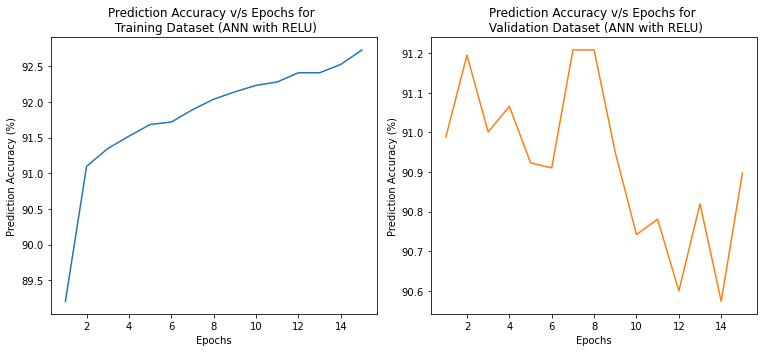

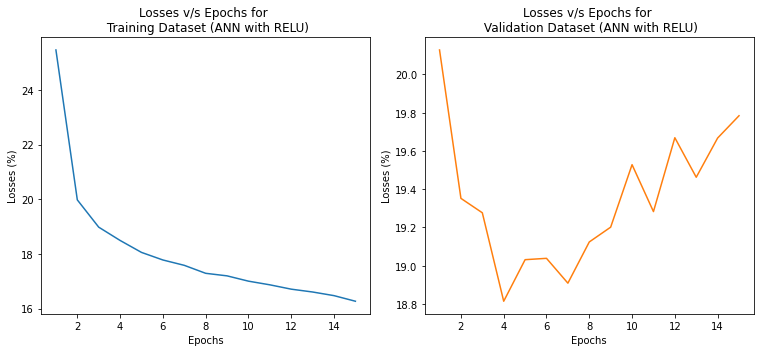

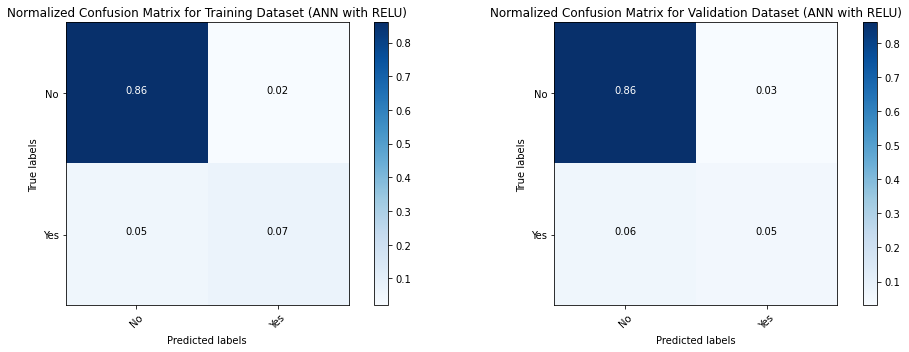

In [22]:
### Coding Cell 022

# Importing the classes, modules and libraries necessary for this cell
from sklearn.metrics import accuracy_score, zero_one_loss

# Verifying the current tensorflow version
if int(tensorflow.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

# Storing the Final Prediction Accuracies of Training and Validation Datsets
train_accuracy_RELU = hist_with_RELU.history[acc_key][-1]
val_accuracy_RELU = hist_with_RELU.history['val_' + acc_key][-1]
train_accuracy_RELU_percentage = round((train_accuracy_RELU * 100.00), 1)
val_accuracy_RELU_percentage = round((val_accuracy_RELU * 100.00), 1)

# Storing the Final Loss Scores of Training and Validation Datsets
train_loss_RELU = hist_with_RELU.history['loss'][-1]
val_loss_RELU = hist_with_RELU.history['val_loss'][-1]
train_loss_RELU_percentage = round((train_loss_RELU * 100.00), 1)
val_loss_RELU_percentage = round((val_loss_RELU * 100.00), 1)

# Creating vectors which would contain Epoch-Wise Accuracy and Loss Scores
train_accuracy_vector_fractions_RELU = np.asarray(hist_with_RELU.history[acc_key]).reshape(-1,1)
train_accuracy_vector_RELU = train_accuracy_vector_fractions_RELU * 100.00  # TrainAccuracyVector
train_losses_vector_fractions_RELU = np.asarray(hist_with_RELU.history['loss']).reshape(-1,1)
train_losses_vector_RELU = train_losses_vector_fractions_RELU * 100.00  # TrainLossVector
val_accuracy_vector_fractions_RELU = np.asarray(hist_with_RELU.history['val_' + acc_key]).reshape(-1,1)
val_accuracy_vector_RELU = val_accuracy_vector_fractions_RELU * 100.00 #ValAccuracyVector 
val_losses_vector_fractions_RELU = np.asarray(hist_with_RELU.history['val_loss']).reshape(-1,1)
val_losses_vector_RELU = val_losses_vector_fractions_RELU * 100.00 #ValLossVector

# Plotting Epoch-Wise Prediction Accuracy Scores of Training and Validation Datasets
datasets_trainval_RELU = ["Training Dataset (ANN with RELU)",
                          "Validation Dataset (ANN with RELU)"
                         ]
plot_accloss_vs_epochs(train_accloss_vector_NN = train_accuracy_vector_RELU,
                       val_accloss_vector_NN = val_accuracy_vector_RELU,
                       epochs = n_of_epochs,
                       datasets = datasets_trainval_RELU,
                       isLoss = False) 

# Plotting Epoch-Wise Loss Scores of Training and Validation Datasets
plot_accloss_vs_epochs(train_accloss_vector_NN = train_losses_vector_RELU,
                       val_accloss_vector_NN = val_losses_vector_RELU,
                       epochs = n_of_epochs,
                       datasets = datasets_trainval_RELU,
                       isLoss = True) 

# Plotting the Confusion Matrices of Training and Validation Datasets
plot_custom_confusion_matrix(cm1 = cm_train_RELU,
                             cm2 = cm_val_RELU,
                             label_names = label_names,
                             datasets = datasets_trainval_RELU)

# Displaying Final Prediction Accuracies of Training and Validation Datasets
np.set_printoptions(precision=2)
print('--- Accuracy Scores ---')
print('Prediction Accuracy Score of Training Dataset for ANN with RELU = ', 
      train_accuracy_RELU_percentage, 
      '%')   
print('Prediction Accuracy Score of Validation Dataset for ANN with RELU = ', 
      val_accuracy_RELU_percentage, 
      '%')  
print('-----------------------')
print('\n')

It is quite evident from the numbers and the plots above that the model trained on ANN with `relu` as activation function for the hidden-layer is slightly overfitting: 
1. **Accuracy Scores**: Accuracy score ($\approx 92.7\%$) of the training dataset is higher than the accuracy score ($\approx 91.0\%$) of the validation dataset
2. **Average Losses**: Average loss for training dataset decreases with increase in the number of epochs but the same for validation dataset is quite unpredictable

#### Defining the Hypothesis Space (Model Structure) for ANN with ELU as Activation Function

Now comes the model with the second of the $3$ different hidden-layer activation functions. The activation function for the hidden-layer is `elu`. 

The hidden-layer is once again going to contain $64$ neurons. The output-layer consists of two neurons --- one for `no` and the other for `yes`. The activation function for the output-layer is `sigmoid` as well. 

In [23]:
### Coding Cell 023

# Importing the classes, modules and libraries necessary for this cell
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

# Creating an object "model" that represents an ANN
model_with_ELU = Sequential()       

# Defining an input layer with 63 nodes (equal to X_train.shape[1]) and 
# adding a hidden layer with 64 (closest 2^n to 63) neurons
neurons = 64
model_with_ELU.add(Dense(units = neurons, 
                         
                         # Activation function for hidden layer
                         activation = 'elu',   
                         
                         input_shape = (d,)
                        )
                  )

# Adding output later consisting of 2 neurons (equal to the number of unique labels)
model_with_ELU.add(Dense(units = 2, 
                         
                         # Activation function for output layer
                         activation='sigmoid'   
                        )
                  ) 

# Displaying the summary of the model for ANN
model_with_ELU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                4096      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________


#### Graphically Displaying the ANN Hypothesis Space of the Model with ELU as Activation Function

The `plot_model()` function is used in order to graphically display the summary of the model created with `elu` activation function for the hidden-layer.

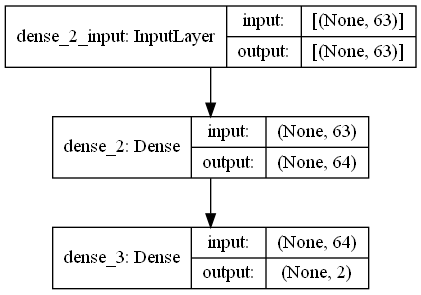

In [24]:
### Coding Cell 024

# Graphically displaying the ANN hypothesis space
tensorflow.keras.utils.plot_model(model_with_ELU,
                                  to_file = 'model_with_ELU.png',
                                  show_shapes = True, 
                                  show_layer_names = True
                                 )

#### Choosing Optimizer, Loss Function and Metrics for the Model with ELU as Activation Function

As was the case with the model with `relu` as activation function for the hidden-layer, for the model created with `elu` as activation function for the hidden-layer, `RMSprop()` has been chosen as the specific SGD variant, `binary_crossentropy` is chosen as the loss function (since there are only $2$ categories) and `accuracy` as the metric. 

In [25]:
### Coding Cell 025

# Selecting Optimizer, Loss Function and Measure of quality
model_with_ELU.compile(
                       # Optimizer 
                       optimizer=tensorflow.keras.optimizers.RMSprop(), 
    
                       # Loss function
                       loss='binary_crossentropy',   
    
                       # Measure of quality
                       metrics=['accuracy']   
                      )   

#### Training the Artificial Neural Network (ANN) Model on the Training Dataset with ELU as Activation Function

The ANN with `elu` as the activation function for the hidden-layer is now ready to be trained on the training dataset `X_train_NN`. The `batch_size` is kept at $32$, `epochs` at $15$ and `X_val_NN` and `y_val_NN` are passed as `validation_data`. 

In [26]:
### Coding Cell 026

# Fitting the model
hist_with_ELU = model_with_ELU.fit(x = X_train_NN, 
                                   y = y_train_NN, 
                                   batch_size = 32, 
                                   epochs = n_of_epochs,
                                   verbose = 0,
                                   validation_data = (X_val_NN, y_val_NN))

#### Predicting Labels of Training and Validation Datasets trained on ANN Model with ELU as Activation Function

The labels for the training as well as the validation datasets are predicted in the following coding cell. The predicted labels will also be compared with the true labels of the datasets in order to find out the accuracy of the ANN with `elu` as the activation function for the hidden-layer.

In [27]:
### Coding Cell 027

# Importing the classes, modules and libraries necessary for this cell
from sklearn.preprocessing import OneHotEncoder

# Predicting the Labels of Training Dataset trained on ANN Model with ELU 
y_train_ELU_pred_encoded = model_with_ELU.predict(X_train, batch_size = 32)
y_train_ELU_pred = enc.inverse_transform(y_train_ELU_pred_encoded)                     

# Predicting the Labels of Validation Dataset trained on ANN Model 
y_val_ELU_pred_encoded = model_with_ELU.predict(X_val, batch_size = 32)                    
y_val_ELU_pred = enc.inverse_transform(y_val_ELU_pred_encoded)             

#### Computing the Confusion Matrices of Training and Validation Datasets trained on ANN Model with ELU as Activation Function

The following coding cell computes the confusion matrix between the true labels and the predicted labels provided by the model trained on ANN with `elu` as the activation function for the hidden-layer. 

In [28]:
### Coding Cell 028

# Evaluating Confusion Matrices of Training and Validation Datasets
cm_train_ELU = compute_confusion_matrix(yTrue = y_train,
                                        yPred = y_train_ELU_pred)
cm_val_ELU = compute_confusion_matrix(yTrue = y_val,
                                      yPred = y_val_ELU_pred)

#### Displaying Overall Accuracy Scores, Visualizing Prediction Accuracy v/s Epoch, Visualizing Losses v/s Epoch and Visualizing Confusion Matrices of Training and Validation Datasets trained on ANN Model with ELU as Activation Function


The overall accuracy scores, average losses and confusion matrices for both the training as well as the validation datasets are visualized via the codes in the following coding cell.

--- Accuracy Scores ---
Prediction Accuracy Score of Training Dataset for ANN with ELU =  92.0 %
Prediction Accuracy Score of Validation Dataset for ANN with ELU =  91.3 %
-----------------------




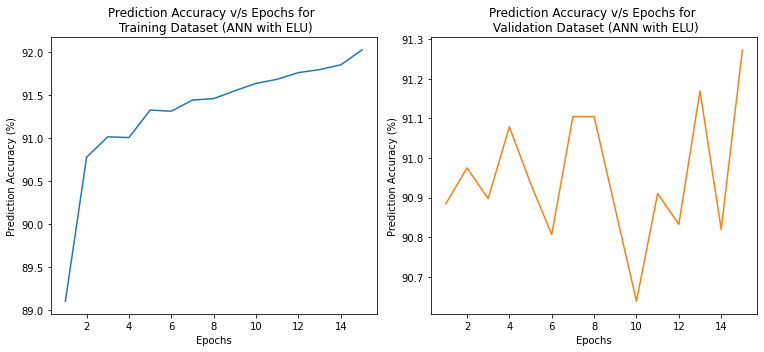

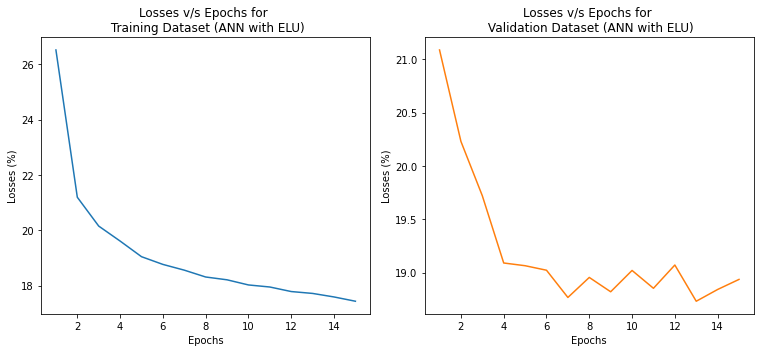

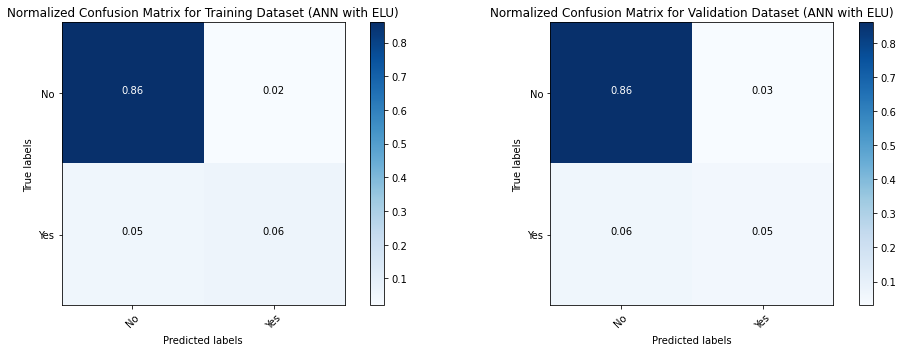

In [29]:
### Coding Cell 029

# Importing the classes, modules and libraries necessary for this cell
from sklearn.metrics import accuracy_score, zero_one_loss

# Storing the Final Prediction Accuracies of Training and Validation Datsets
train_accuracy_ELU = hist_with_ELU.history[acc_key][-1]
val_accuracy_ELU = hist_with_ELU.history['val_' + acc_key][-1]
train_accuracy_ELU_percentage = round((train_accuracy_ELU * 100.00), 1)
val_accuracy_ELU_percentage = round((val_accuracy_ELU * 100.00), 1)

# Storing the Final Loss Scores of Training and Validation Datsets
train_loss_ELU = hist_with_ELU.history['loss'][-1]
val_loss_ELU = hist_with_ELU.history['val_loss'][-1]
train_loss_ELU_percentage = round((train_loss_ELU * 100.00), 1)
val_loss_ELU_percentage = round((val_loss_ELU * 100.00), 1)

# Creating vectors which would contain Epoch-Wise Accuracy and Loss Scores
train_accuracy_vector_fractions_ELU = np.asarray(hist_with_ELU.history[acc_key]).reshape(-1,1)
train_accuracy_vector_ELU = train_accuracy_vector_fractions_ELU * 100.00  # TrainAccuracyVector
train_losses_vector_fractions_ELU = np.asarray(hist_with_ELU.history['loss']).reshape(-1,1)
train_losses_vector_ELU = train_losses_vector_fractions_ELU * 100.00  # TrainLossVector
val_accuracy_vector_fractions_ELU = np.asarray(hist_with_ELU.history['val_' + acc_key]).reshape(-1,1)
val_accuracy_vector_ELU = val_accuracy_vector_fractions_ELU * 100.00 #ValAccuracyVector 
val_losses_vector_fractions_ELU = np.asarray(hist_with_ELU.history['val_loss']).reshape(-1,1)
val_losses_vector_ELU = val_losses_vector_fractions_ELU * 100.00 #ValLossVector

# Plotting Epoch-Wise Prediction Accuracy Scores of Training and Validation Datasets
datasets_trainval_ELU = ["Training Dataset (ANN with ELU)",
                         "Validation Dataset (ANN with ELU)"
                        ]
plot_accloss_vs_epochs(train_accloss_vector_NN = train_accuracy_vector_ELU,
                       val_accloss_vector_NN = val_accuracy_vector_ELU,
                       epochs = n_of_epochs,
                       datasets = datasets_trainval_ELU,
                       isLoss = False) 

# Plotting Epoch-Wise Loss Scores of Training and Validation Datasets
plot_accloss_vs_epochs(train_accloss_vector_NN = train_losses_vector_ELU,
                       val_accloss_vector_NN = val_losses_vector_ELU,
                       epochs = n_of_epochs,
                       datasets = datasets_trainval_ELU,
                       isLoss = True) 

# Plotting the Confusion Matrices of Training and Validation Datasets
plot_custom_confusion_matrix(cm1 = cm_train_ELU,
                             cm2 = cm_val_ELU,
                             label_names = label_names,
                             datasets = datasets_trainval_ELU)

# Displaying Final Prediction Accuracies of Training and Validation Datasets
np.set_printoptions(precision=2)
print('--- Accuracy Scores ---')
print('Prediction Accuracy Score of Training Dataset for ANN with ELU = ', 
      train_accuracy_ELU_percentage, 
      '%')   
print('Prediction Accuracy Score of Validation Dataset for ANN with ELU = ', 
      val_accuracy_ELU_percentage, 
      '%')  
print('-----------------------')
print('\n')

The model trained on ANN with `elu` as activation function for the hidden-layer shows better results than those for the model trained with `relu` as the activation function for the hidden-layer.  
1. **Accuracy Scores**: Accuracy score ($\approx 92.0\%$) of the training dataset and the accuracy score ($\approx 91.3\%$) of validation datasets are almost close to each other, indicating that the model can predict hitherto-unseen data fairly well. 
2. **Average Losses**: Average loss for training dataset decreases with increase in the number of epochs and so does the average loss for the validation dataset. There are some zig-zag patterns for the validation dataset but the overall loss is on the decline. 

#### Defining the Hypothesis Space (Model Structure) for ANN with TANH as Activation Function

Finally, here is the model with the third of the $3$ different hidden-layer activation functions. The activation function for the hidden-layer is `tanh`. 

The hidden-layer, as usual, contains $64$ neurons. The output-layer consists of two neurons --- one for `no` and the other for `yes`. The activation function for the output-layer is `sigmoid`, as usual. 

In [30]:
### Coding Cell 030

# Importing the classes, modules and libraries necessary for this cell
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

# Creating an object "model" that represents an ANN
model_with_TANH = Sequential()       

# Defining an input layer with 63 nodes (equal to X_train.shape[1]) and 
# adding a hidden layer with 64 (closest 2^n to 63) neurons
neurons = 64
model_with_TANH.add(Dense(units = neurons, 
                          
                          # Activation function for hidden layer
                          activation = 'tanh',   
                          
                          input_shape = (d,)
                         )
                   )

# Adding output later consisting of 2 neurons (equal to the number of unique labels)
model_with_TANH.add(Dense(units = 2, 
                          
                          # Activation function for output layer
                          activation='sigmoid'   
                         )
                   ) 

# Displaying the summary of the model for ANN
model_with_TANH.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                4096      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________


#### Graphically Displaying the ANN Hypothesis Space of the Model with TANH as Activation Function

Once again, the `plot_model()` function is used in order to graphically display the summary of the model created with `tanh` activation function for the hidden-layer.

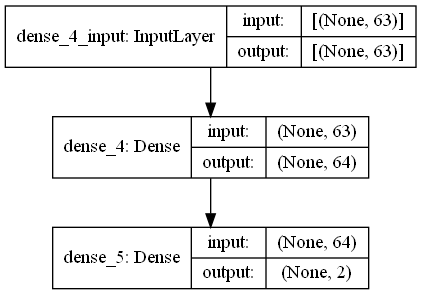

In [31]:
### Coding Cell 031

# Graphically displaying the ANN hypothesis space
tensorflow.keras.utils.plot_model(model_with_TANH,
                                  to_file = 'model_with_TANH.png',
                                  show_shapes = True, 
                                  show_layer_names = True
                                 )

#### Choosing Optimizer, Loss Function and Metrics for the Model with TANH as Activation Function

Just like the previous two models with `relu` and `elu` as activation functions for the hidden-layers, for the model created with `tanh` as activation function for the hidden-layer, `RMSprop()` has been chosen as the specific SGD variant, `binary_crossentropy` is chosen as the loss function (since there are only $2$ categories) and `accuracy` as the metric. 

In [32]:
### Coding Cell 032

# Selecting Optimizer, Loss Function and Measure of quality
model_with_TANH.compile(
                        # Optimizer
                        optimizer=tensorflow.keras.optimizers.RMSprop(),   
    
                        # Loss function
                        loss='binary_crossentropy',
    
                        # Measure of quality
                        metrics=['accuracy']   
                       )   

#### Training the Artificial Neural Network (ANN) Model on the Training Dataset with TANH as Activation Function

The ANN with `tanh` as the activation function for the hidden-layer is now ready to be trained on the training dataset `X_train_NN`. As usual, the `batch_size` is kept at $32$, `epochs` at $15$ and `X_val_NN` and `y_val_NN` are passed as `validation_data`. 

In [33]:
### Coding Cell 033

# Fitting the model
hist_with_TANH = model_with_TANH.fit(x = X_train_NN, 
                                     y = y_train_NN, 
                                     batch_size = 32, 
                                     epochs = n_of_epochs,
                                     verbose = 0,
                                     validation_data = (X_val_NN, y_val_NN))

#### Predicting Labels of Training and Validation Datasets trained on ANN Model with TANH as Activation Function

The labels for the training as well as the validation datasets are predicted in the following coding cell. The predicted labels will also be compared with the true labels of the datasets in order to find out the accuracy of the ANN with `tanh` as the activation function for the hidden-layer.

In [34]:
### Coding Cell 034

# Importing the classes, modules and libraries necessary for this cell
from sklearn.preprocessing import OneHotEncoder

# Predicting the Labels of Training Dataset trained on ANN Model with ELU 
y_train_TANH_pred_encoded = model_with_TANH.predict(X_train, batch_size = 32)
y_train_TANH_pred = enc.inverse_transform(y_train_TANH_pred_encoded)                     

# Predicting the Labels of Validation Dataset trained on ANN Model 
y_val_TANH_pred_encoded = model_with_TANH.predict(X_val, batch_size = 32)                    
y_val_TANH_pred = enc.inverse_transform(y_val_TANH_pred_encoded)             

#### Computing the Confusion Matrices of Training and Validation Datasets trained on ANN Model with TANH as Activation Function

The following coding cell computes the confusion matrix between the true labels and the predicted labels provided by the model trained on ANN with `tanh` as the activation function for the hidden-layer. 

In [35]:
### Coding Cell 035

# Evaluating Confusion Matrices of Training and Validation Datasets
cm_train_TANH = compute_confusion_matrix(yTrue = y_train,
                                         yPred = y_train_TANH_pred)
cm_val_TANH = compute_confusion_matrix(yTrue = y_val,
                                       yPred = y_val_TANH_pred)

#### Displaying Overall Accuracy Scores, Visualizing Prediction Accuracy v/s Epoch, Visualizing Losses v/s Epoch and Visualizing Confusion Matrices of Training and Validation Datasets trained on ANN Model with TANH as Activation Function


The overall accuracy scores, average losses and confusion matrices for both the training as well as the validation datasets are visualized via codes in the following coding cell.

--- Accuracy Scores ---
Prediction Accuracy Score of Training Dataset for ANN with TANH =  92.6 %
Prediction Accuracy Score of Validation Dataset for ANN with TANH =  90.9 %
-----------------------




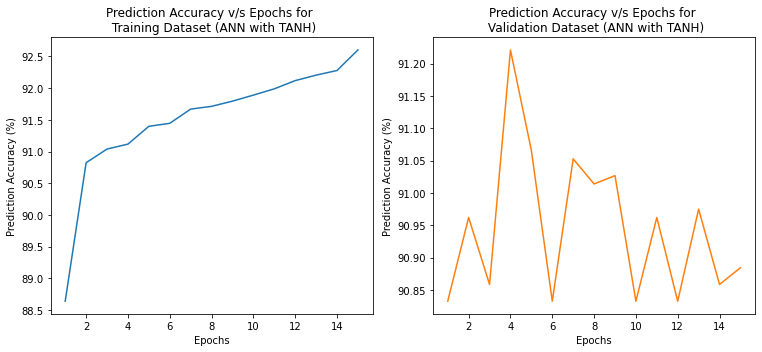

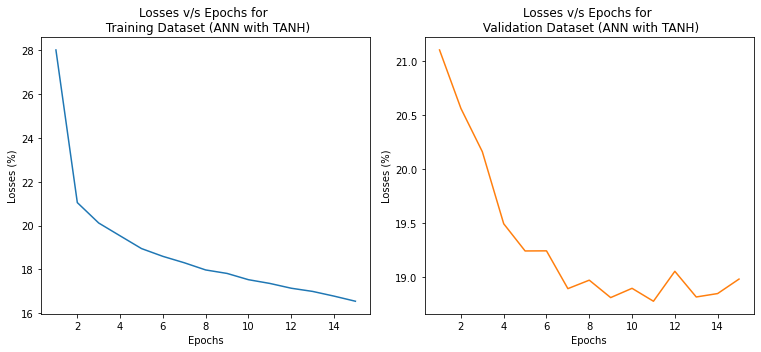

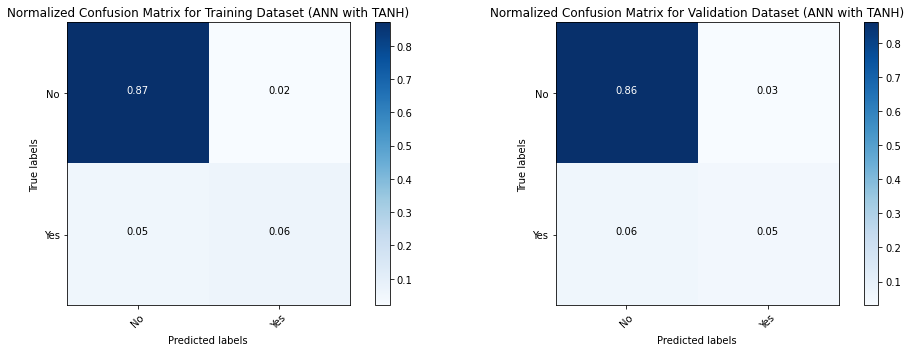

In [36]:
### Coding Cell 036

# Importing the classes, modules and libraries necessary for this cell
from sklearn.metrics import accuracy_score, zero_one_loss

# Storing the Final Prediction Accuracies of Training and Validation Datsets
train_accuracy_TANH = hist_with_TANH.history[acc_key][-1]
val_accuracy_TANH = hist_with_TANH.history['val_' + acc_key][-1]
train_accuracy_TANH_percentage = round((train_accuracy_TANH * 100.00), 1)
val_accuracy_TANH_percentage = round((val_accuracy_TANH * 100.00), 1)

# Storing the Final Loss Scores of Training and Validation Datsets
train_loss_TANH = hist_with_TANH.history['loss'][-1]
val_loss_TANH = hist_with_TANH.history['val_loss'][-1]
train_loss_TANH_percentage = round((train_loss_TANH * 100.00), 1)
val_loss_TANH_percentage = round((val_loss_TANH * 100.00), 1)

# Creating vectors which would contain Epoch-Wise Accuracy and Loss Scores
train_accuracy_vector_fractions_TANH = np.asarray(hist_with_TANH.history[acc_key]).reshape(-1,1)
train_accuracy_vector_TANH = train_accuracy_vector_fractions_TANH * 100.00  # TrainAccuracyVector
train_losses_vector_fractions_TANH = np.asarray(hist_with_TANH.history['loss']).reshape(-1,1)
train_losses_vector_TANH = train_losses_vector_fractions_TANH * 100.00  # TrainLossVector
val_accuracy_vector_fractions_TANH = np.asarray(hist_with_TANH.history['val_' + acc_key]).reshape(-1,1)
val_accuracy_vector_TANH = val_accuracy_vector_fractions_TANH * 100.00 #ValAccuracyVector 
val_losses_vector_fractions_TANH = np.asarray(hist_with_TANH.history['val_loss']).reshape(-1,1)
val_losses_vector_TANH = val_losses_vector_fractions_TANH * 100.00 #ValLossVector

# Plotting Epoch-Wise Prediction Accuracy Scores of Training and Validation Datasets
datasets_trainval_TANH = ["Training Dataset (ANN with TANH)",
                          "Validation Dataset (ANN with TANH)"
                         ]
plot_accloss_vs_epochs(train_accloss_vector_NN = train_accuracy_vector_TANH,
                       val_accloss_vector_NN = val_accuracy_vector_TANH,
                       epochs = n_of_epochs,
                       datasets = datasets_trainval_TANH,
                       isLoss = False) 

# Plotting Epoch-Wise Loss Scores of Training and Validation Datasets
plot_accloss_vs_epochs(train_accloss_vector_NN = train_losses_vector_TANH,
                       val_accloss_vector_NN = val_losses_vector_TANH,
                       epochs = n_of_epochs,
                       datasets = datasets_trainval_TANH,
                       isLoss = True) 

# Plotting the Confusion Matrices of Training and Validation Datasets
plot_custom_confusion_matrix(cm1 = cm_train_TANH,
                             cm2 = cm_val_TANH,
                             label_names = label_names,
                             datasets = datasets_trainval_TANH)

# Displaying Final Prediction Accuracies of Training and Validation Datasets
np.set_printoptions(precision=2)
print('--- Accuracy Scores ---')
print('Prediction Accuracy Score of Training Dataset for ANN with TANH = ', 
      train_accuracy_TANH_percentage, 
      '%')   
print('Prediction Accuracy Score of Validation Dataset for ANN with TANH = ', 
      val_accuracy_TANH_percentage, 
      '%')  
print('-----------------------')
print('\n')

The model trained on ANN with `tanh` as activation function for the hidden-layer shows results similar to the ones show by the model trained with `elu` as the activation function for the hidden-layer.  
1. **Accuracy Scores**: Accuracy score ($\approx 92.6\%$) of the training dataset is slightly higher than the accuracy score ($\approx 90.9\%$) of the validation dataset. 
2. **Average Losses**: Average losses for both for training and validation datasets decrease with increase in the number of epochs. Saw-tooth like patterns are present for the validation dataset but, then again, the overall average loss is on the decline. 

## Results

### Evaluating Test Dataset Results with Artifical Neural Network

Now is the time to predict the labels of the test dataset with all the $3$ models trained on ANN with $3$ different (`relu`, `elu`, `tanh`) activation functions for the hidden-layers. 

In [37]:
#### Coding Cell 037

# Importing the classes, modules and libraries necessary for this cell
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, zero_one_loss, confusion_matrix

# Evaluating the accuracy and loss for Test Dataset with RELU
test_loss_RELU, test_accuracy_RELU = model_with_RELU.evaluate(X_test_NN, 
                                                              y_test_NN, 
                                                              verbose = 0)
test_accuracy_RELU_percentage = round((test_accuracy_RELU * 100.00), 1)

# Evaluating the accuracy and loss for Test Dataset with ELU
test_loss_ELU, test_accuracy_ELU = model_with_ELU.evaluate(X_test_NN, 
                                                           y_test_NN, 
                                                           verbose = 0)
test_accuracy_ELU_percentage = round((test_accuracy_ELU * 100.00), 1)

# Evaluating the accuracy and loss for Test Dataset with TANH
test_loss_TANH, test_accuracy_TANH = model_with_TANH.evaluate(X_test_NN, 
                                                             y_test_NN, 
                                                             verbose = 0)
test_accuracy_TANH_percentage = round((test_accuracy_TANH * 100.00), 1)

### Graphical Representation of Prediction Accuracy Scores for Different Activation Functions

The prediction accuracy scores for all the $3$ datasets (`training`, `validation` and `test`) are being compared for all the $3$ models trained on ANN with $3$ different (`relu`, `elu`, `tanh`) activation functions for the hidden-layers. 

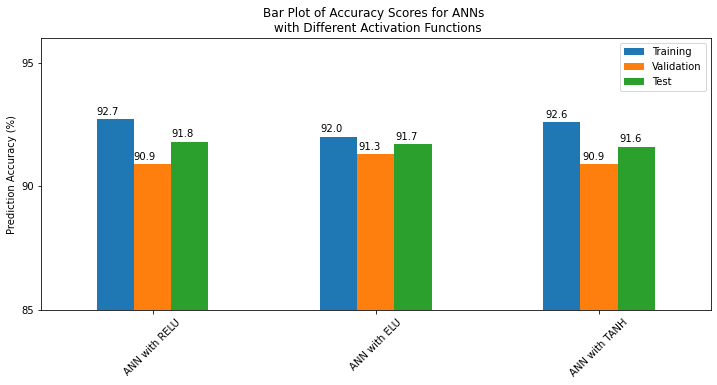

In [38]:
# Coding Cell 038

# Defining the names of rows for pandas DataFrame
indices = ['ANN with RELU', 'ANN with ELU', 'ANN with TANH']

# Creating a pandas DataFrame with Prediction Accuracy Scores of all Models
train_accuracies = [round(train_accuracy_RELU_percentage,1), 
                    round(train_accuracy_ELU_percentage,1),  
                    round(train_accuracy_TANH_percentage,1)]
val_accuracies = [round(val_accuracy_RELU_percentage,1), 
                  round(val_accuracy_ELU_percentage,1),
                  round(val_accuracy_TANH_percentage,1)]
test_accuracies = [round(test_accuracy_RELU_percentage,1), 
                   round(test_accuracy_ELU_percentage,1),
                   round(test_accuracy_TANH_percentage,1)]
df_acc = pd.DataFrame({'Training': train_accuracies,
                       'Validation': val_accuracies,
                       'Test': test_accuracies}, 
                      index = indices) 

# Plotting the bar-plots of Accuracy and Loss Scores
fig, ax1 = plt.subplots(figsize=(12,5), nrows=1, ncols=1)
df_acc.plot(ax = ax1, 
            kind = 'bar', 
            rot = 45)
ax1.set_ylabel('Prediction Accuracy (%)')
ax1.set_ylim(85, 96)
ax1.set_yticks((85, 90, 95))
ax1.set_title("Bar Plot of Accuracy Scores for ANNs \n with Different Activation Functions")
for p1 in ax1.patches:
  ax1.annotate(str(p1.get_height()), (p1.get_x() * 1.005, p1.get_height() * 1.002))
plt.show()

The target set for the prediction accuracy score at the beginning of this investigation was $85\%$. Not only have all the models with $3$ different activation functions for the hidden-layer successfully surpassed that target score, but all the scores ($\approx 91.7\%$) are also quite close to each other.  

**The model trained on ANN with `elu` as the activation function for the hidden-layer** is going to be the main choice, because that is the one where the **prediction accuracy scores are quite close to each other for all the $3$ different datasets (`training`, `validation` and `test`)**. It means that this model **does not suffer too much from overfitting** and **can exhibit the same level of consistency** when it comes to predicting the labels for hitherto-unseen data. 

The other $2$ models suffer from overfitting. If there were more datapoints, perhaps the those $2$ models with `relu` and `tanh` activation functions for the hidden-layer could have provided higher accuracy scores and better consistency. 

## Conclusion

In this mini-investigation, evaluation of the performances of Artificial Neural Network (ANN) with $3$ different (`relu`, `elu` and `tanh`) activation functions for the hidden-layer for a bank telemarketing dataset, obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing), is conducted. The goal was to predict if a particular customer would be interested in opening a fixed-deposit bank account following rigorous bank telemarketing campaigns by banks during the global pandemic. Previous investigations with machine learning algorithms, such as Logistic Regression, Decision Trees and Support Vector Machines, could yield an accuracy score of only $76\%$[[1]](https://www.sciencedirect.com/science/article/abs/pii/S016792361400061X). 

Current investigation of the same dataset trained on ANN with $3$ different activation functions for the hidden-layer produced a prediction accuracy score of approximately $91.7\%$, which is way higher than the target score ($85\%$) defined for the prediction accuracy for this mini-investigation. This implies that now bank employees will be much more confident when it comes to ringing up the customers during bank telemarketing campaigns. 

The model trained on ANN with `elu` as the activation function has been ultimately chosen as the one to go with, because 
- the prediction accuracy scores for any hitherto-unseen data are almost close to the prediction accuracy scores for the data which is already known to it
- the average losses for both the training and validation datasets kept on decreasing with increase in the number of epochs 

The other two models either showed overfitting or the performance of the model was not satisfactory on unseen data. 

Since the dataset contained only $41188$ datapoints and $20$ features, going too much into the depth, even with ANN, was not quite possible. More number of datapoints would have been helpful in minimizing the overfitting of the models with `relu` and `tanh` as activation functions for the hidden-layer and could have also increased the prediction accuracy scores of all the $3$ models. These data were first recorded between $2008$ and $2013$ following a global recession in the year $2008$. If similar types of data are also collected in future, following the end of this pandemic, not only would the dataset be enhanced but it would also open a window of opportunity for further investigations with Deep Neural Nets in the near and distant future.   
